In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation and Cleaning

In [2]:
df = pd.read_csv('fetal_health.csv')

In [3]:
df.head().T

,0,1,2,3,4
baseline value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


In [4]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [6]:
df.describe().round(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,...,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000,2126.000
mean,133.304,0.003,0.009,0.004,0.002,0.000,0.000,46.990,1.333,9.847,...,93.579,164.025,4.068,0.324,137.452,134.611,138.090,18.808,0.320,1.304
std,9.841,0.004,0.047,0.003,0.003,0.000,0.001,17.193,0.883,18.397,...,29.560,17.944,2.949,0.706,16.381,15.594,14.467,28.978,0.611,0.614
min,106.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000,0.200,0.000,...,50.000,122.000,0.000,0.000,60.000,73.000,77.000,0.000,-1.000,1.000
25%,126.000,0.000,0.000,0.002,0.000,0.000,0.000,32.000,0.700,0.000,...,67.000,152.000,2.000,0.000,129.000,125.000,129.000,2.000,0.000,1.000
50%,133.000,0.002,0.000,0.004,0.000,0.000,0.000,49.000,1.200,0.000,...,93.000,162.000,3.000,0.000,139.000,136.000,139.000,7.000,0.000,1.000
75%,140.000,0.006,0.003,0.007,0.003,0.000,0.000,61.000,1.700,11.000,...,120.000,174.000,6.000,0.000,148.000,145.000,148.000,24.000,1.000,1.000
max,160.000,0.019,0.481,0.015,0.015,0.001,0.005,87.000,7.000,91.000,...,159.000,238.000,18.000,10.000,187.000,182.000,186.000,269.000,1.000,3.000


In [7]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [8]:
# Applying label encoding to the target variable
df['fetal_health'] = df['fetal_health'].astype(int)

fetal_health = {
    1: 'normal', 
    2: 'suspect', 
    3: 'pathological'
}

df.fetal_health = df.fetal_health.map(fetal_health)

In [9]:
df[['light_decelerations', 'severe_decelerations', 'prolongued_decelerations']].describe()

,light_decelerations,severe_decelerations,prolongued_decelerations
count,2126.000000,2126.000000,2126.000000
mean,0.001889,0.000003,0.000159
std,0.002960,0.000057,0.000590
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.003000,0.000000,0.000000
max,0.015000,0.001000,0.005000


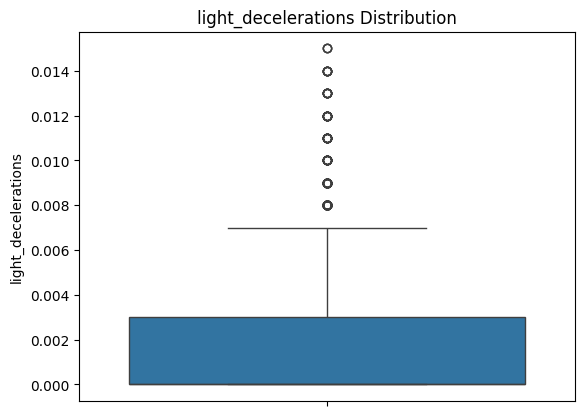

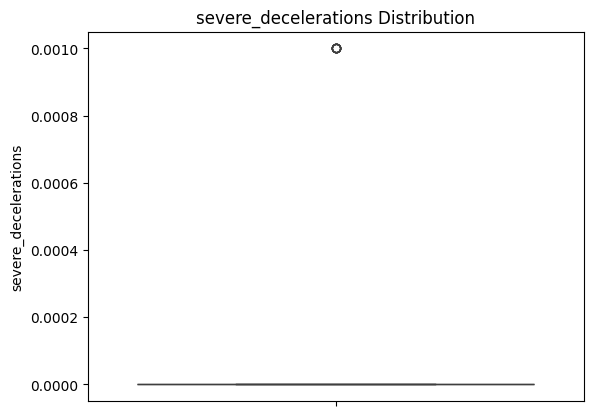

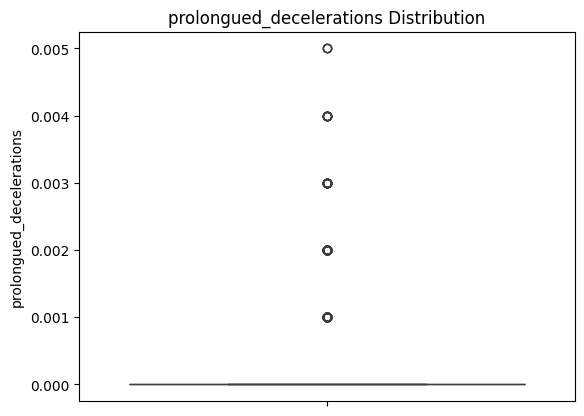

In [10]:
features_decelaration = ['light_decelerations', 'severe_decelerations', 'prolongued_decelerations']
for feature in features_decelaration:
    sns.boxplot(df[feature])
    plt.title(f'{feature} Distribution')
    plt.show()


## Setting up the validation framework

In [11]:
len(df)

2126

In [12]:
# Split the data into training (80%) and test (20%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Split the training data into training (75%) and validation (25%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [13]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Extract target labels from the original DataFrame (this part is correct)
y_train = df_train['fetal_health'].values
y_val = df_val['fetal_health'].values
y_test = df_test['fetal_health'].values

del df_train['fetal_health']
del df_val['fetal_health']
del df_test['fetal_health']

In [14]:
# Convert DataFrames to dictionaries
dicts_train = df_train.to_dict(orient='records')
dicts_val = df_val.to_dict(orient='records')
dicts_test = df_test.to_dict(orient='records')

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)

# Convert dictionaries to feature arrays (numerical format)
X_train = dv.fit_transform(dicts_train)
X_val = dv.transform(dicts_val)
X_test = dv.transform(dicts_test)

In [15]:
dicts_test[10]

{'baseline value': 138.0,
 'accelerations': 0.0,
 'fetal_movement': 0.0,
 'uterine_contractions': 0.007,
 'light_decelerations': 0.002,
 'severe_decelerations': 0.0,
 'prolongued_decelerations': 0.0,
 'abnormal_short_term_variability': 34.0,
 'mean_value_of_short_term_variability': 1.0,
 'percentage_of_time_with_abnormal_long_term_variability': 6.0,
 'mean_value_of_long_term_variability': 10.5,
 'histogram_width': 56.0,
 'histogram_min': 99.0,
 'histogram_max': 155.0,
 'histogram_number_of_peaks': 5.0,
 'histogram_number_of_zeroes': 0.0,
 'histogram_mode': 148.0,
 'histogram_mean': 142.0,
 'histogram_median': 146.0,
 'histogram_variance': 9.0,
 'histogram_tendency': 1.0}

In [16]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,normal


## Feature importance: Fetal health rate and risk ratio

In [17]:
# Reversing the mapping (fetal_health column back to numeric labels)
fetal_health = {
    'normal': 1, 
    'suspect': 2, 
    'pathological': 3
}

df['fetal_health'] = df['fetal_health'].map(fetal_health)

# Now compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation with the target variable (fetal_health)
print(correlation_matrix['fetal_health'].sort_values(ascending=False))


fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

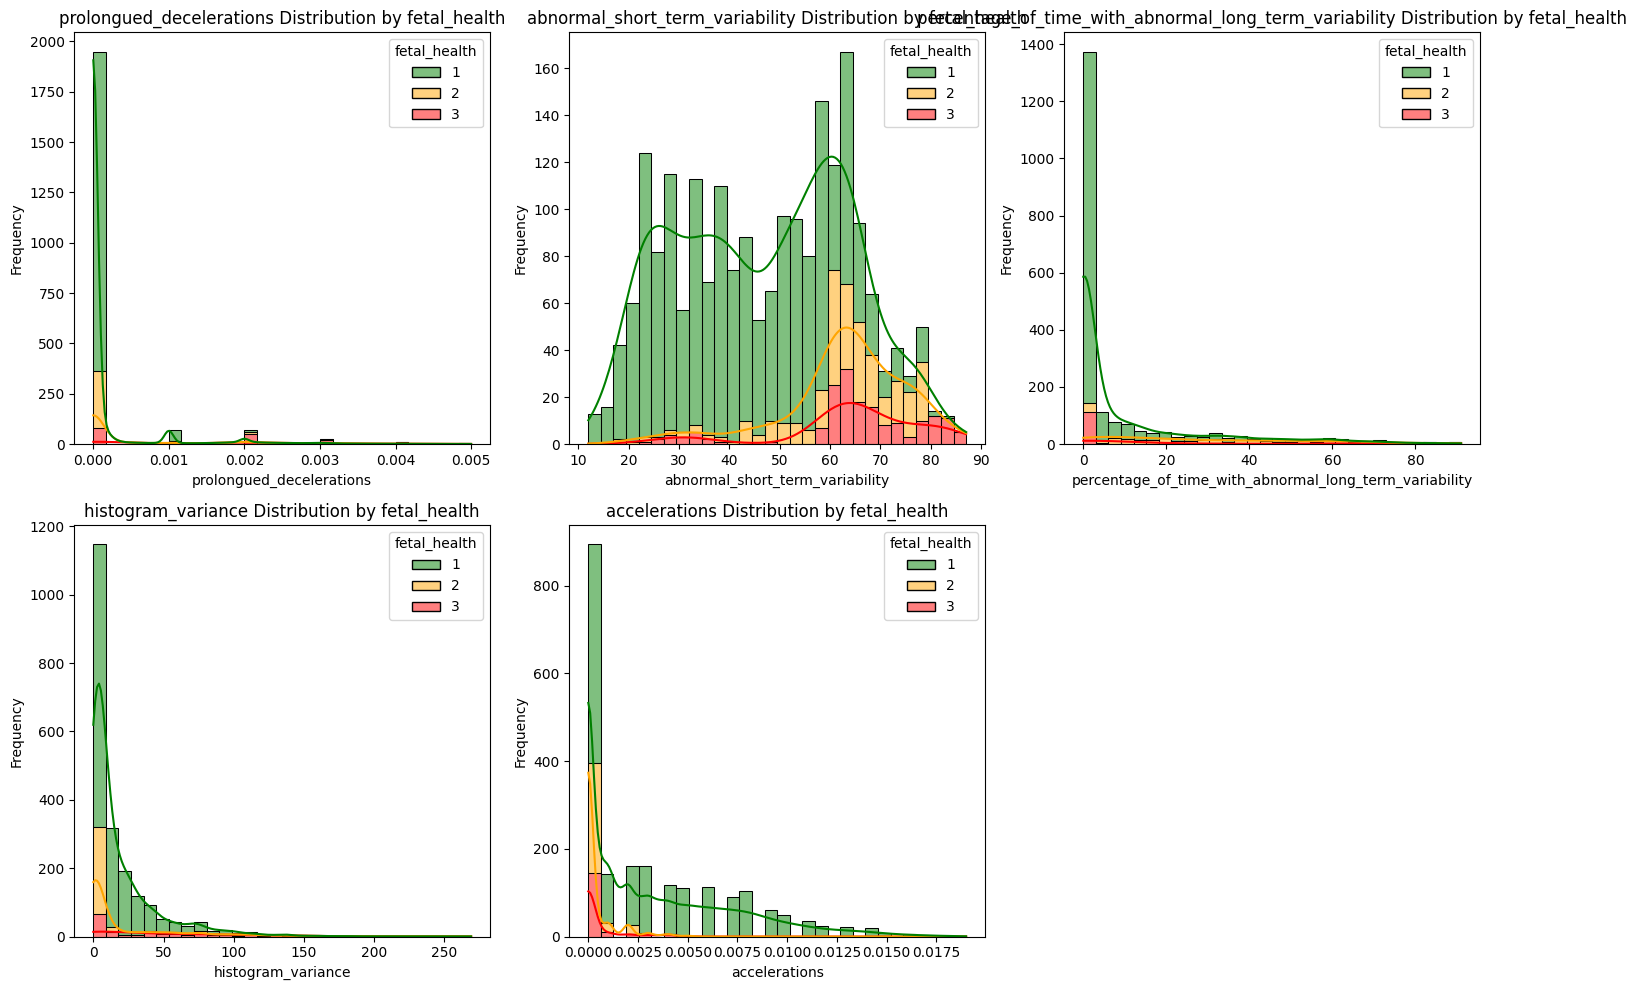

In [18]:
# List of important features
important_features = [
    'prolongued_decelerations',
    'abnormal_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'histogram_variance',
    'accelerations'
]

# Define a color palette for fetal_health categories
palette = {1: "green", 2: "orange", 3: "red"}

# Set the size of the plots
plt.figure(figsize=(15, 10))

# Loop through each feature and plot a histogram with colors
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)  # Grid of 2 rows and 3 columns
    sns.histplot(
        data=df, 
        x=feature, 
        hue='fetal_health', 
        palette=palette,  # Apply color palette
        kde=True, 
        multiple="stack", 
        bins=30
    )
    plt.title(f'{feature} Distribution by fetal_health')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


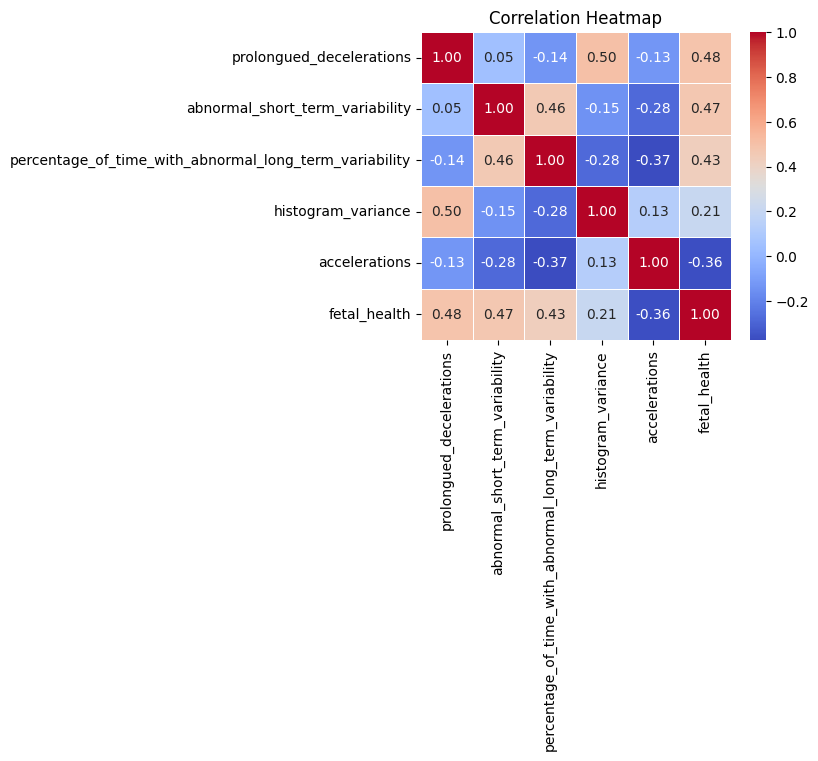

In [19]:
# Calculate the correlation matrix between features and fetal_health
corr_matrix = df[important_features + ['fetal_health']].corr()

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Logistic regression

 - Note that EDA has already been performed above, it is divided between the previous and current sections. I try out with default Logistic Regression, Decision Trees, Random Forests, XGBoost

In [20]:
y_train_series = pd.Series(y_train)
y_train_series.value_counts()

normal          1000
suspect          169
pathological     106
Name: count, dtype: int64

In [21]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)

C:\Users\LENOVO\.virtualenvs\mid-term-project-p64MDsHN\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [22]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Display the first few predictions alongside actual values
validation_results = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred
})
print(validation_results.head())

         Actual     Predicted
0        normal        normal
1        normal       suspect
2        normal        normal
3  pathological  pathological
4        normal        normal


In [23]:
# Get the intercept
intercept = model.intercept_[0]
print(f"Model Intercept: {intercept}")

Model Intercept: 0.7368428511376405


In [24]:
# Predictions
y_pred = model.predict(X_test)

# Classification report (includes Precision, Recall, F1-score for each class)
print(classification_report(y_test, y_pred, target_names=['normal', 'suspect', 'pathological']))

              precision    recall  f1-score   support

      normal       0.97      0.78      0.86       326
     suspect       0.56      0.84      0.68        32
pathological       0.44      0.75      0.56        68

    accuracy                           0.78       426
   macro avg       0.66      0.79      0.70       426
weighted avg       0.85      0.78      0.80       426



In [25]:
# Initialize LabelEncoder to convert string labels to integers
le = LabelEncoder()

# Encode the target variable (y_train) to numeric values
y_train_encoded = le.fit_transform(y_train)  # This will encode ['normal', 'suspect', 'pathological'] to [0, 1, 2]

# Manually adjusting class weights (using encoded integer labels)
class_weights = {0: 1,  # normal class (encoded as 0)
                 1: 3,  # suspect class (encoded as 1)
                 2: 5}  # pathological class (encoded as 2)

# Initialize Logistic Regression with custom class weights
model = LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weights)

# Train the model with the custom class weights
model.fit(X_train, y_train_encoded)

# Make predictions (use the same encoding for y_test)
y_pred = model.predict(X_test)

# Decode the predicted values back to original labels for evaluation
y_pred_decoded = le.inverse_transform(y_pred)

# Evaluate the model with the classification report
print(classification_report(y_test, y_pred_decoded, target_names=['normal', 'suspect', 'pathological']))


              precision    recall  f1-score   support

      normal       0.96      0.81      0.88       326
     suspect       0.70      0.72      0.71        32
pathological       0.45      0.78      0.57        68

    accuracy                           0.80       426
   macro avg       0.70      0.77      0.72       426
weighted avg       0.86      0.80      0.82       426



C:\Users\LENOVO\.virtualenvs\mid-term-project-p64MDsHN\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation
 - quantifying how well the model is handling:
   - normal
   - pathological

In [26]:
print(type(y_test[0]), type(y_pred[0]))

<class 'str'> <class 'numpy.int64'>


In [27]:
# Mapping of numerical labels to string labels
label_map = {0: 'normal', 1: 'suspect', 2: 'pathological'}

# Map y_pred values to string labels
y_pred_str = [label_map[label] for label in y_pred]

# Now calculate the precision score with the string labels
normal_precision = precision_score(y_test, y_pred_str, average='weighted', labels=['normal', 'suspect', 'pathological'])
print("Weighted Precision:", normal_precision)

Weighted Precision: 0.7598854673257613


### Training with different thresholds

In [28]:
# For multiclass, use 'macro' or 'weighted' average
normal_precision = precision_score(y_test, y_pred_str, average='weighted', labels=['normal', 'suspect', 'pathological'])
normal_recall = recall_score(y_test, y_pred_str, average='weighted', labels=['normal', 'suspect', 'pathological'])

print("Weighted Precision:", normal_precision)
print("Weighted Recall:", normal_recall)

Weighted Precision: 0.7598854673257613
Weighted Recall: 0.6525821596244131


In [29]:
# Predict probabilities instead of direct labels
y_prob = model.predict_proba(X_test)

# For multiclass classification, set custom thresholds for each class
thresholds = {'normal': 0.3, 'suspect': 0.4, 'pathological': 0.6}

# Convert predicted probabilities to class predictions based on custom thresholds
y_pred_custom = []
for prob in y_prob:
    # Get the class index with highest probability and check if it exceeds the threshold
    predicted_class_idx = np.argmax(prob)
    class_name = le.inverse_transform([predicted_class_idx])[0]  # Get the class label
    if prob[predicted_class_idx] >= thresholds[class_name]:
        y_pred_custom.append(predicted_class_idx)
    else:
        # Assign the class with the highest probability but below the threshold
        # Optionally, you can set a default or None for these cases
        y_pred_custom.append(predicted_class_idx)

# Evaluate the model with the custom thresholded predictions
y_pred_custom_decoded = le.inverse_transform(y_pred_custom)
print(classification_report(y_test, y_pred_custom_decoded, target_names=['normal', 'suspect', 'pathological']))


              precision    recall  f1-score   support

      normal       0.96      0.81      0.88       326
     suspect       0.70      0.72      0.71        32
pathological       0.45      0.78      0.57        68

    accuracy                           0.80       426
   macro avg       0.70      0.77      0.72       426
weighted avg       0.86      0.80      0.82       426



In [30]:
# Initialize LabelEncoder to convert string labels to integers
le = LabelEncoder()

# Encode the target variable (y_train) to numeric values
y_train_encoded = le.fit_transform(y_train)  # This will encode ['normal', 'suspect', 'pathological'] to [0, 1, 2]

# Define new class weights
class_weights = {0: 1,  # normal class
                 1: 5,  # suspect class
                 2: 10}  # pathological class

# Initialize Logistic Regression with custom class weights
model = LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weights)

# Train the model with the custom class weights
model.fit(X_train, y_train_encoded)

# Make predictions (use the same encoding for y_test)
y_pred = model.predict(X_test)

# Decode the predicted values back to original labels for evaluation
y_pred_decoded = le.inverse_transform(y_pred)

# Evaluate the model with the classification report
print(classification_report(y_test, y_pred_decoded, target_names=['normal', 'suspect', 'pathological']))


              precision    recall  f1-score   support

      normal       0.97      0.71      0.82       326
     suspect       0.64      0.72      0.68        32
pathological       0.37      0.82      0.51        68

    accuracy                           0.73       426
   macro avg       0.66      0.75      0.67       426
weighted avg       0.85      0.73      0.76       426



C:\Users\LENOVO\.virtualenvs\mid-term-project-p64MDsHN\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # Use class_weight='balanced' to handle class imbalance
dt_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Decode predictions back to original labels
y_pred_dt_decoded = le.inverse_transform(y_pred_dt)

# Evaluate the model
print("Decision Tree Classifier Results:")
print(classification_report(y_test, y_pred_dt_decoded, target_names=['normal', 'suspect', 'pathological']))

Decision Tree Classifier Results:
              precision    recall  f1-score   support

      normal       0.93      0.95      0.94       326
     suspect       0.85      0.88      0.86        32
pathological       0.78      0.66      0.71        68

    accuracy                           0.90       426
   macro avg       0.85      0.83      0.84       426
weighted avg       0.90      0.90      0.90       426



In [32]:
# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None,   
    random_state=42,
    class_weight={0: 1, 1: 5, 2: 10}  
)

# Train the model
rf_model.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Decode the predictions for evaluation
y_pred_rf_decoded = le.inverse_transform(y_pred_rf)

# Evaluate the model
print(classification_report(y_test, y_pred_rf_decoded, target_names=['normal', 'suspect', 'pathological']))

              precision    recall  f1-score   support

      normal       0.94      0.99      0.97       326
     suspect       0.91      0.91      0.91        32
pathological       0.94      0.69      0.80        68

    accuracy                           0.94       426
   macro avg       0.93      0.86      0.89       426
weighted avg       0.94      0.94      0.94       426



In [33]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': [{0: 1, 1: 5, 2: 10}]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train_encoded)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train model with best parameters
best_rf_model = grid_search.best_estimator_

# Predict on test data
y_pred_rf = best_rf_model.predict(X_test)

# Decode predictions
y_pred_rf_decoded = le.inverse_transform(y_pred_rf)

# Evaluate the tuned model
print(classification_report(y_test, y_pred_rf_decoded, target_names=['normal', 'suspect', 'pathological']))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'class_weight': {0: 1, 1: 5, 2: 10}, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

      normal       0.95      0.99      0.97       326
     suspect       0.91      0.91      0.91        32
pathological       0.91      0.72      0.80        68

    accuracy                           0.94       426
   macro avg       0.92      0.87      0.89       426
weighted avg       0.94      0.94      0.94       426



In [34]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'class_weight': {0: 1, 1: 5, 2: 10}, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


{'baseline value': 132.0,
 'accelerations': 0.009,
 'fetal_movement': 0.0,
 'uterine_contractions': 0.011,
 'light_decelerations': 0.0,
 'severe_decelerations': 0.0,
 'prolongued_decelerations': 0.0,
 'abnormal_short_term_variability': 32.0,
 'mean_value_of_short_term_variability': 1.3,
 'percentage_of_time_with_abnormal_long_term_variability': 0.0,
 'mean_value_of_long_term_variability': 12.3,
 'histogram_width': 87.0,
 'histogram_min': 95.0,
 'histogram_max': 182.0,
 'histogram_number_of_peaks': 5.0,
 'histogram_number_of_zeroes': 0.0,
 'histogram_mode': 155.0,
 'histogram_mean': 146.0,
 'histogram_median': 149.0,
 'histogram_variance': 15.0,
 'histogram_tendency': 0.0}

In [35]:
import numpy as np

# Check for missing values in the target variable (y_train_encoded)
missing_values = np.isnan(y_train_encoded).sum()
print(f"Missing values in target variable: {missing_values}")

# Check unique classes in the target variable
unique_classes = np.unique(y_train_encoded)
print(f"Unique classes in target variable: {unique_classes}")

Missing values in target variable: 0
Unique classes in target variable: [0 1 2]


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
auc_scores = []

for train_idx, val_idx in skf.split(X_train, y_train_encoded):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Train the model
    rf_model.fit(X_train_fold, y_train_fold)

    # Predict probabilities
    y_pred_val = rf_model.predict_proba(X_val_fold)

    # Compute AUC for the fold
    auc = roc_auc_score(y_val_fold, y_pred_val, multi_class='ovr')
    auc_scores.append(auc)

# Print results
print(f'Cross-validation AUC: {np.mean(auc_scores):.5f} ± {np.std(auc_scores):.5f}')

In [ ]:
# Full list of all original feature names (must match the number of columns in X_train)
all_feature_names = [
    'histogram_mean', 'baseline value', 'accelerations', 'severe_decelerations',
    'histogram_mode', 'prolongued_decelerations', 'mean_value_of_short_term_variability',
    'histogram_number_of_zeroes', 'fetal_movement', 'histogram_median', 'histogram_max',
    'histogram_min', 'histogram_tendency', 'light_decelerations', 'abnormal_short_term_variability',
    'uterine_contractions', 'percentage_of_time_with_abnormal_long_term_variability',
    'histogram_number_of_peaks', 'histogram_width', 'mean_value_of_long_term_variability',
    'histogram_variance'
]

# Convert X_train and X_val to DataFrames with all feature names
X_train = pd.DataFrame(X_train, columns=all_feature_names)
X_val = pd.DataFrame(X_val, columns=all_feature_names)

# Filter the dataset to include only the selected features
X_train_filtered = X_train[important_features]
X_val_filtered = X_val[important_features]

# Train the Random Forest model with filtered features
rf_model.fit(X_train_filtered, y_train_encoded)

# Evaluate performance
y_pred_train = rf_model.predict_proba(X_train_filtered)
train_auc = roc_auc_score(y_train_encoded, y_pred_train, multi_class='ovr')
print('Train AUC:', train_auc)

y_pred_val = rf_model.predict_proba(X_val_filtered)
val_auc = roc_auc_score(y_val_encoded, y_pred_val, multi_class='ovr')
print('Validation AUC:', val_auc)

In [40]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit the encoder on training labels
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)  # Make sure to transform y_val using the same encoder

# Best parameters from GridSearchCV
best_params = {
    'class_weight': {0: 1, 1: 5, 2: 10},
    'max_depth': 2,
    'min_samples_split': 5,
    'n_estimators': 100
}

# Initialize Random Forest with the best parameters
rf_model = RandomForestClassifier(random_state=42, **best_params)

# Train the model
rf_model.fit(X_train, y_train_encoded)

# Train AUC (using predict_proba for probabilities)
y_pred_train = rf_model.predict_proba(X_train)
train_auc = roc_auc_score(y_train_encoded, y_pred_train, multi_class='ovr')
print('Train AUC:', train_auc)

# Validation AUC
y_pred_val = rf_model.predict_proba(X_val)
val_auc = roc_auc_score(y_val_encoded, y_pred_val, multi_class='ovr')
print('Validation AUC:', val_auc)

Train AUC: 0.9447598769307817
Validation AUC: 0.9641167052125973


In [ ]:
!pip install xgboost

In [19]:
xgb_params = {
    'objective': 'multi:softprob',  # Use softprob for probabilities
    'num_class': len(np.unique(y_train_encoded)),  # Number of unique classes
    'learning_rate': 0.01,
    'max_depth': 1,  # Can be tuned
    'min_child_weight': 1,
    'n_estimators': 100,  # Number of trees
    'seed': 42,
    'verbosity': 1
}

# Initialize the model
xgb_model = xgb.XGBClassifier(**xgb_params)

# Train the XGBoost model
xgb_model.fit(X_train, y_train_encoded)

# Train AUC
y_pred_train = xgb_model.predict_proba(X_train)
train_auc = roc_auc_score(y_train_encoded, y_pred_train, multi_class='ovr')
print('Train AUC:', train_auc)

# Validation AUC
y_pred_val = xgb_model.predict_proba(X_val)
val_auc = roc_auc_score(y_val_encoded, y_pred_val, multi_class='ovr')
print('Validation AUC:', val_auc)

NameError: name 'np' is not defined

In [52]:
fetus = {'baseline value': 140.0,
 'accelerations': 0.004,
 'fetal_movement': 0.0,
 'uterine_contractions': 0.004,
 'light_decelerations': 0.0,
 'severe_decelerations': 0.0,
 'prolongued_decelerations': 0.0,
 'abnormal_short_term_variability': 80.0,
 'mean_value_of_short_term_variability': 0.2,
 'percentage_of_time_with_abnormal_long_term_variability': 36.0,
 'mean_value_of_long_term_variability': 2.2,
 'histogram_width': 18.0,
 'histogram_min': 140.0,
 'histogram_max': 158.0,
 'histogram_number_of_peaks': 1.0,
 'histogram_number_of_zeroes': 0.0,
 'histogram_mode': 147.0,
 'histogram_mean': 148.0,
 'histogram_median': 149.0,
 'histogram_variance': 1.0,
 'histogram_tendency': 0.0}

## Saving the model

In [55]:
import pickle

# Save both the transformer (dv) and model (xgb_model) into a tuple
with open('fetal_health_model.bin', 'wb') as f_out:
    pickle.dump((dv, xgb_model), f_out)

print("Model and transformer saved successfully.")

Model and transformer saved successfully.


In [9]:
import pickle

with open('fetal_health_model.bin', 'rb') as f_in:
    dv, xgb_model = pickle.load(f_in)

In [10]:
dv, xgb_model

(DictVectorizer(sparse=False),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=1, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
               num_parallel_tree=None, ...))

In [17]:
fetus = {'baseline value': 140.0,
 'accelerations': 0.004,
 'fetal_movement': 0.0,
 'uterine_contractions': 0.004,
 'light_decelerations': 0.0,
 'severe_decelerations': 0.0,
 'prolongued_decelerations': 0.0,
 'abnormal_short_term_variability': 80.0,
 'mean_value_of_short_term_variability': 0.2,
 'percentage_of_time_with_abnormal_long_term_variability': 36.0,
 'mean_value_of_long_term_variability': 2.2,
 'histogram_width': 18.0,
 'histogram_min': 140.0,
 'histogram_max': 158.0,
 'histogram_number_of_peaks': 1.0,
 'histogram_number_of_zeroes': 0.0,
 'histogram_mode': 147.0,
 'histogram_mean': 148.0,
 'histogram_median': 149.0,
 'histogram_variance': 1.0,
 'histogram_tendency': 0.0}